In [41]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

In [121]:
n_clusters = 5
data, cluster_labels = make_blobs(n_samples=500, n_features=2000, centers=n_clusters, center_box=(-10.0, 10.0), cluster_std=[1,1,4,1,1], random_state=42)
data = data + np.abs(np.min(data))

In [122]:
def make_figure(cluster_labels):
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    #ax = fig.add_subplot(111, projection='3d')
    for c in range(cluster_labels.max()+1):
        ax.scatter(data[cluster_labels==c].T[0],data[cluster_labels==c].T[1], label=c)
        #ax.scatter(data[cluster_labels==c].T[0],data[cluster_labels==c].T[1],data[cluster_labels==c].T[2], label=c)
    plt.legend(ncol=4, loc='upper right')
    plt.show()

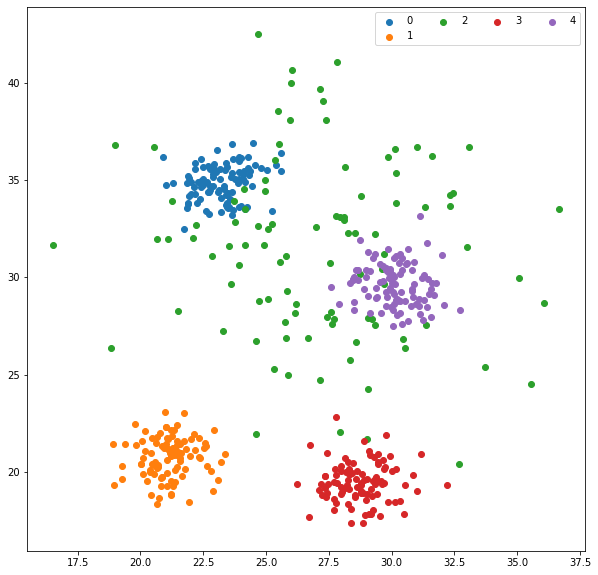

In [123]:
make_figure(cluster_labels)

In [124]:
metrics = ['euclidean', 'correlation', 'cosine']

In [125]:
def make_silhouette(cluster_labels):
    for k in metrics:
        y_lower = 10
        sample_silhouette_values = silhouette_samples(data, cluster_labels, metric=k)
        silhouette_avg=silhouette_score(data, cluster_labels, metric=k)
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(15, 35)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax.set_xlim([-1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax.set_ylim([0, data.shape[0] + (n_clusters + 1) * 10])

        for i in range(max(cluster_labels)+1):
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.gnuplot(float(i) / n_clusters)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.8, (y_lower+y_upper)/2, "%d"%i, fontsize=18)

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples


        ax.set_title("gtex subtissues\n%s metric\n%d clusters"%(k,n_clusters), fontsize=20)
        ax.set_xlabel("score", fontsize=20)
        # Label the silhouette plots with their cluster numbers at the middle
        ax.axvline(x=silhouette_avg, color="red", linestyle="--", lw=2)
        plt.tick_params(labelsize=20)
        plt.show()
        fig.savefig("silhouette_blobs_%s.pdf"%(k))
        del sample_silhouette_values
        del silhouette_avg

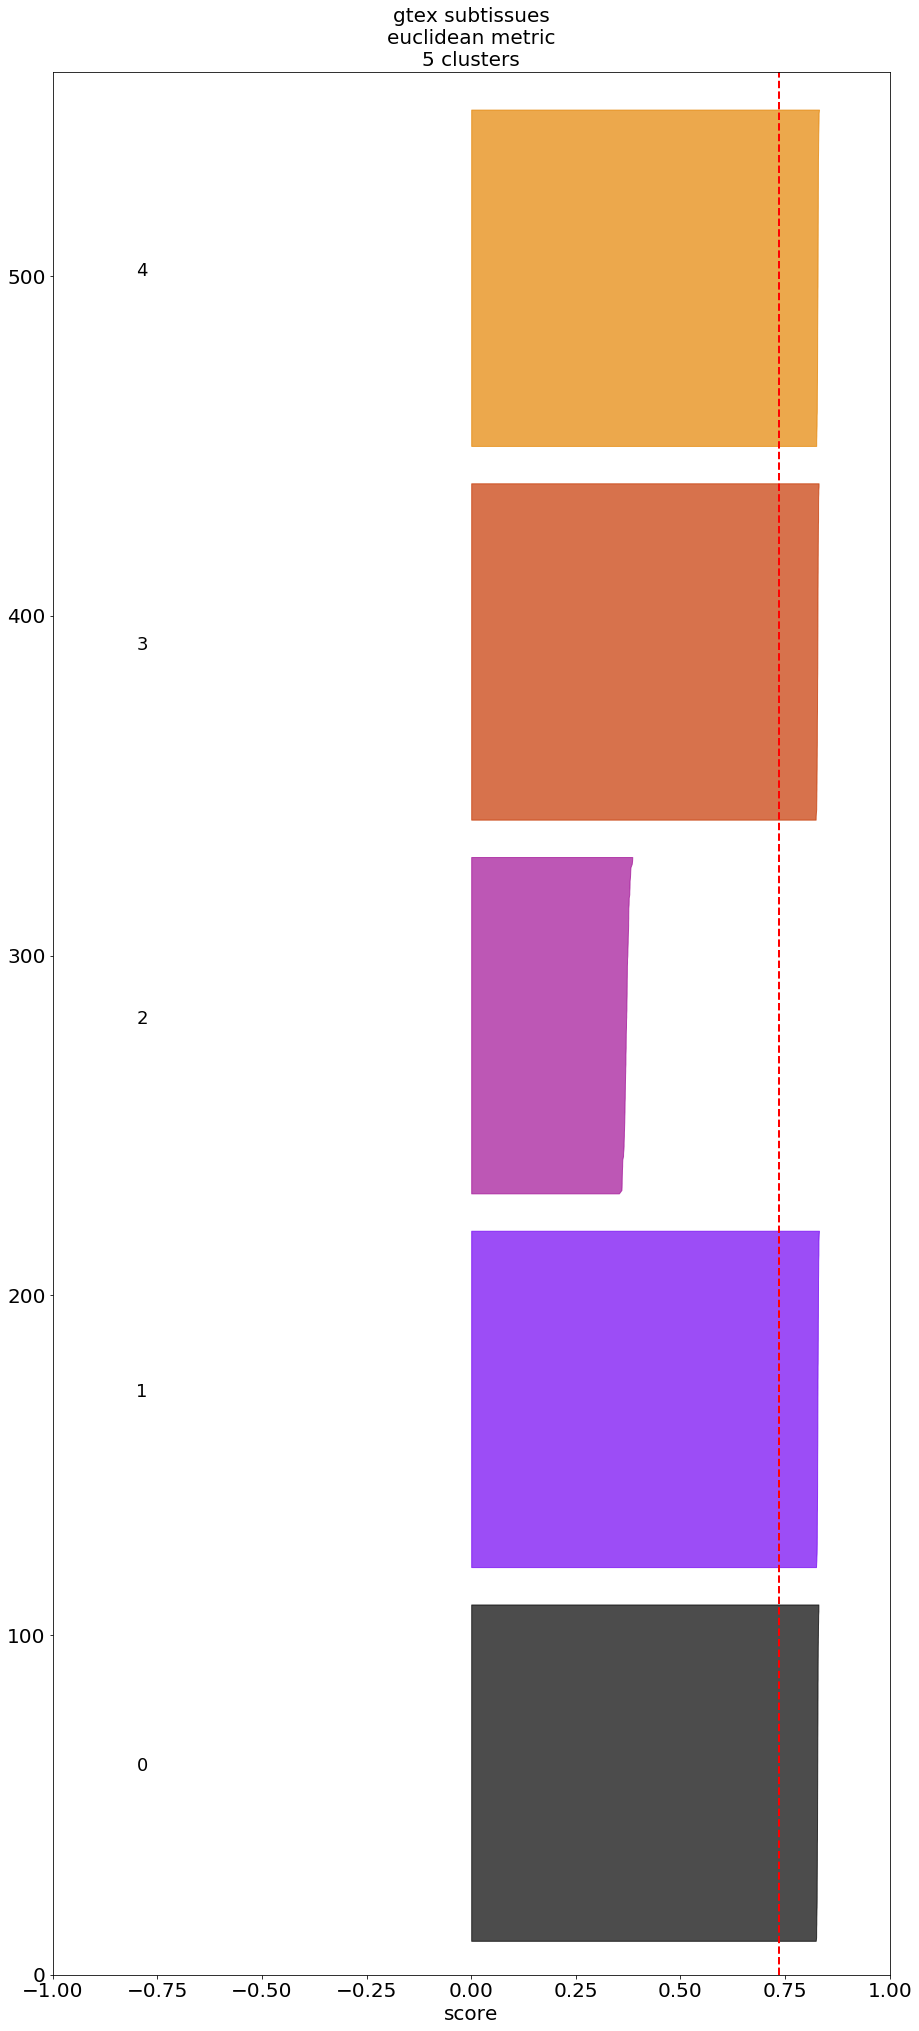

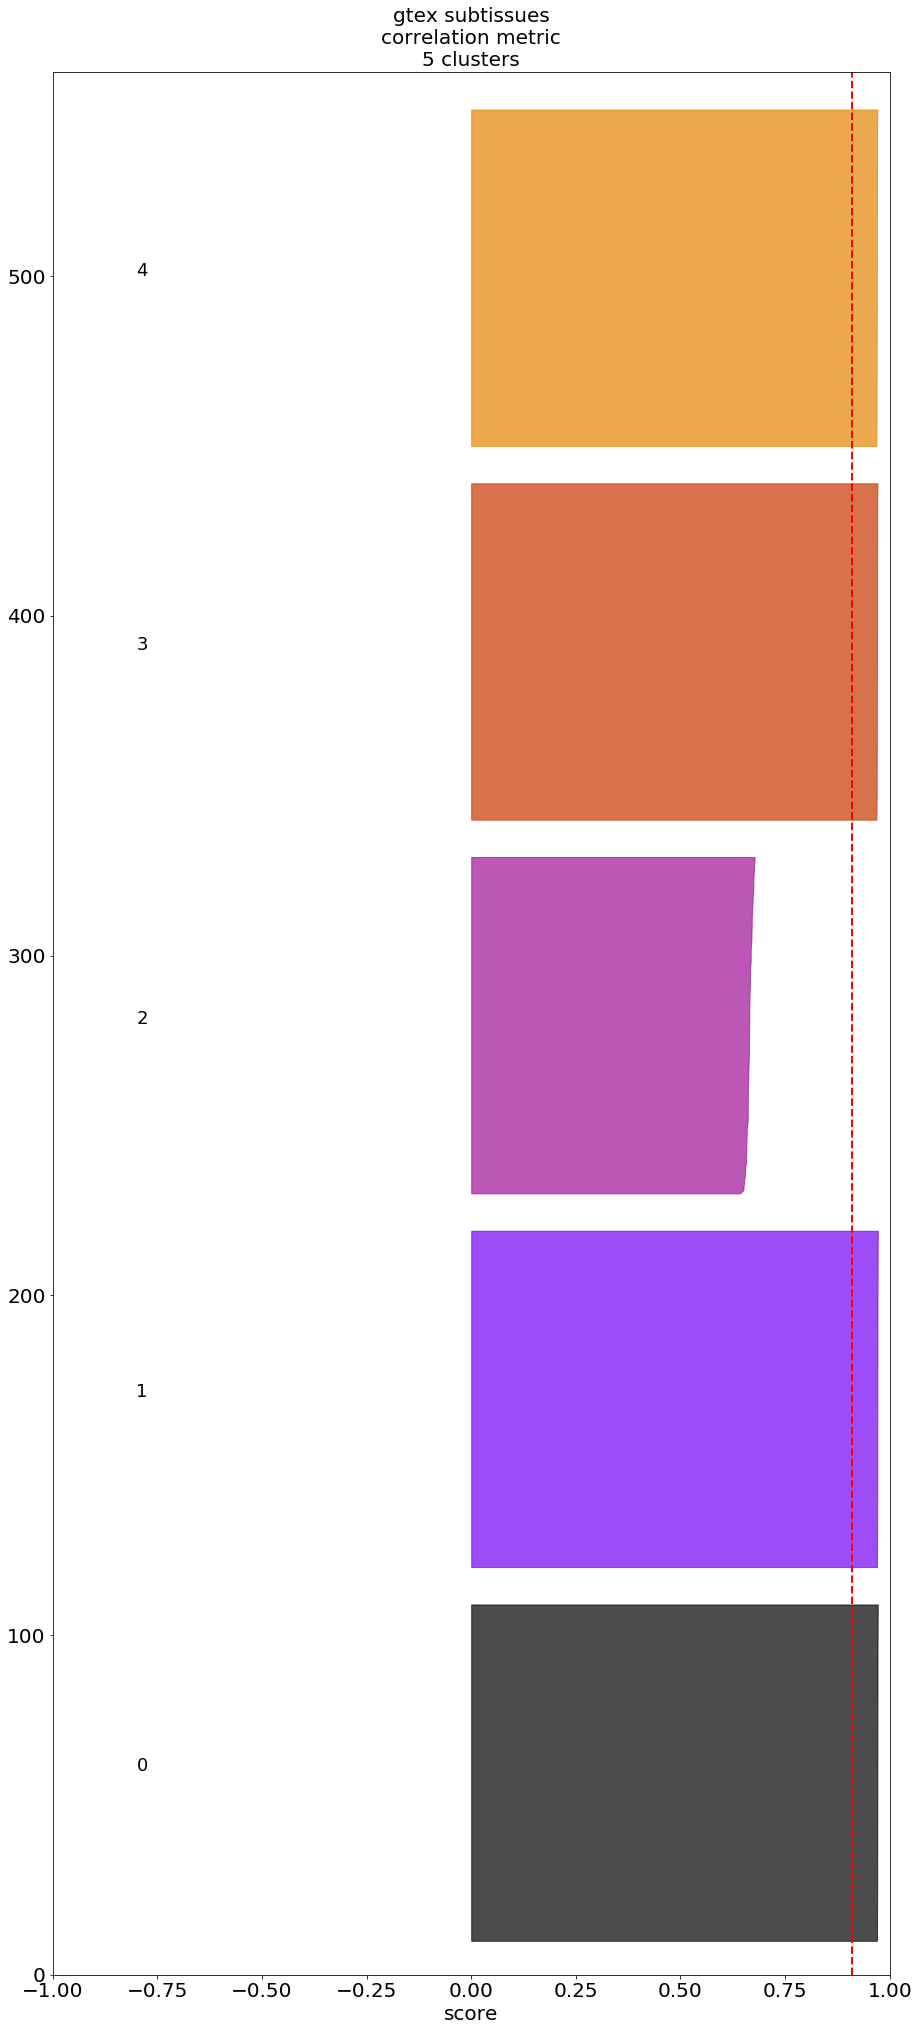

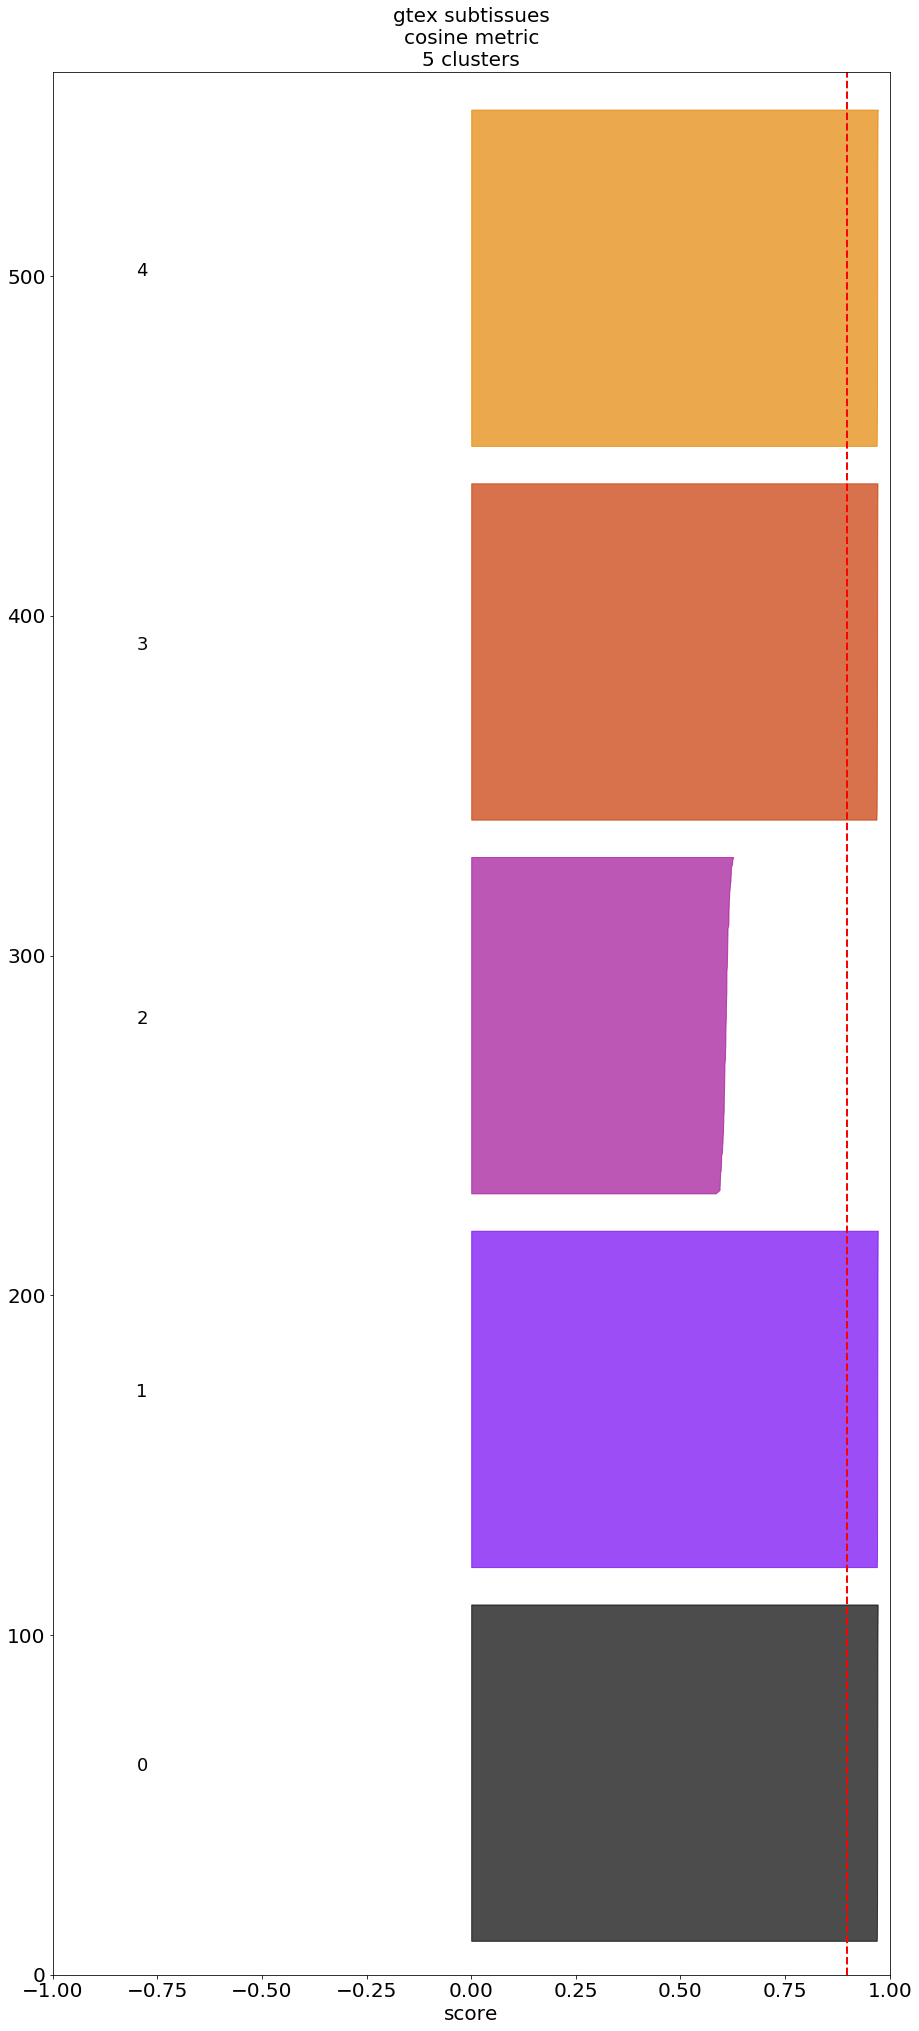

In [126]:
make_silhouette(cluster_labels)

In [127]:
model = KMeans(n_clusters=n_clusters, n_init=1000)

In [128]:
out = model.fit_predict(data)

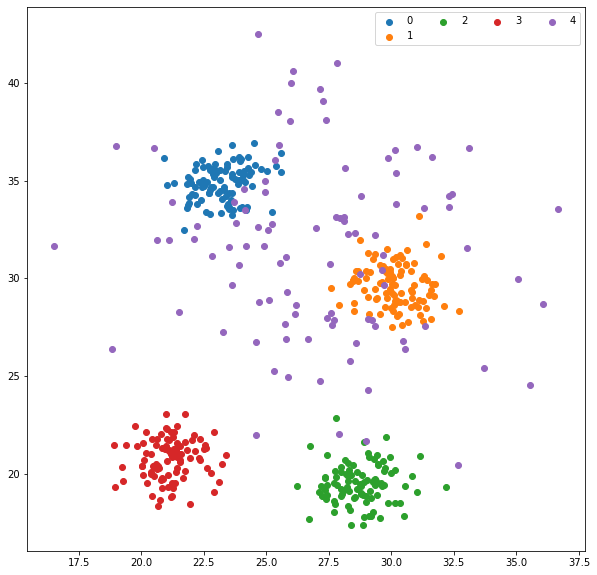

In [129]:
make_figure(out)

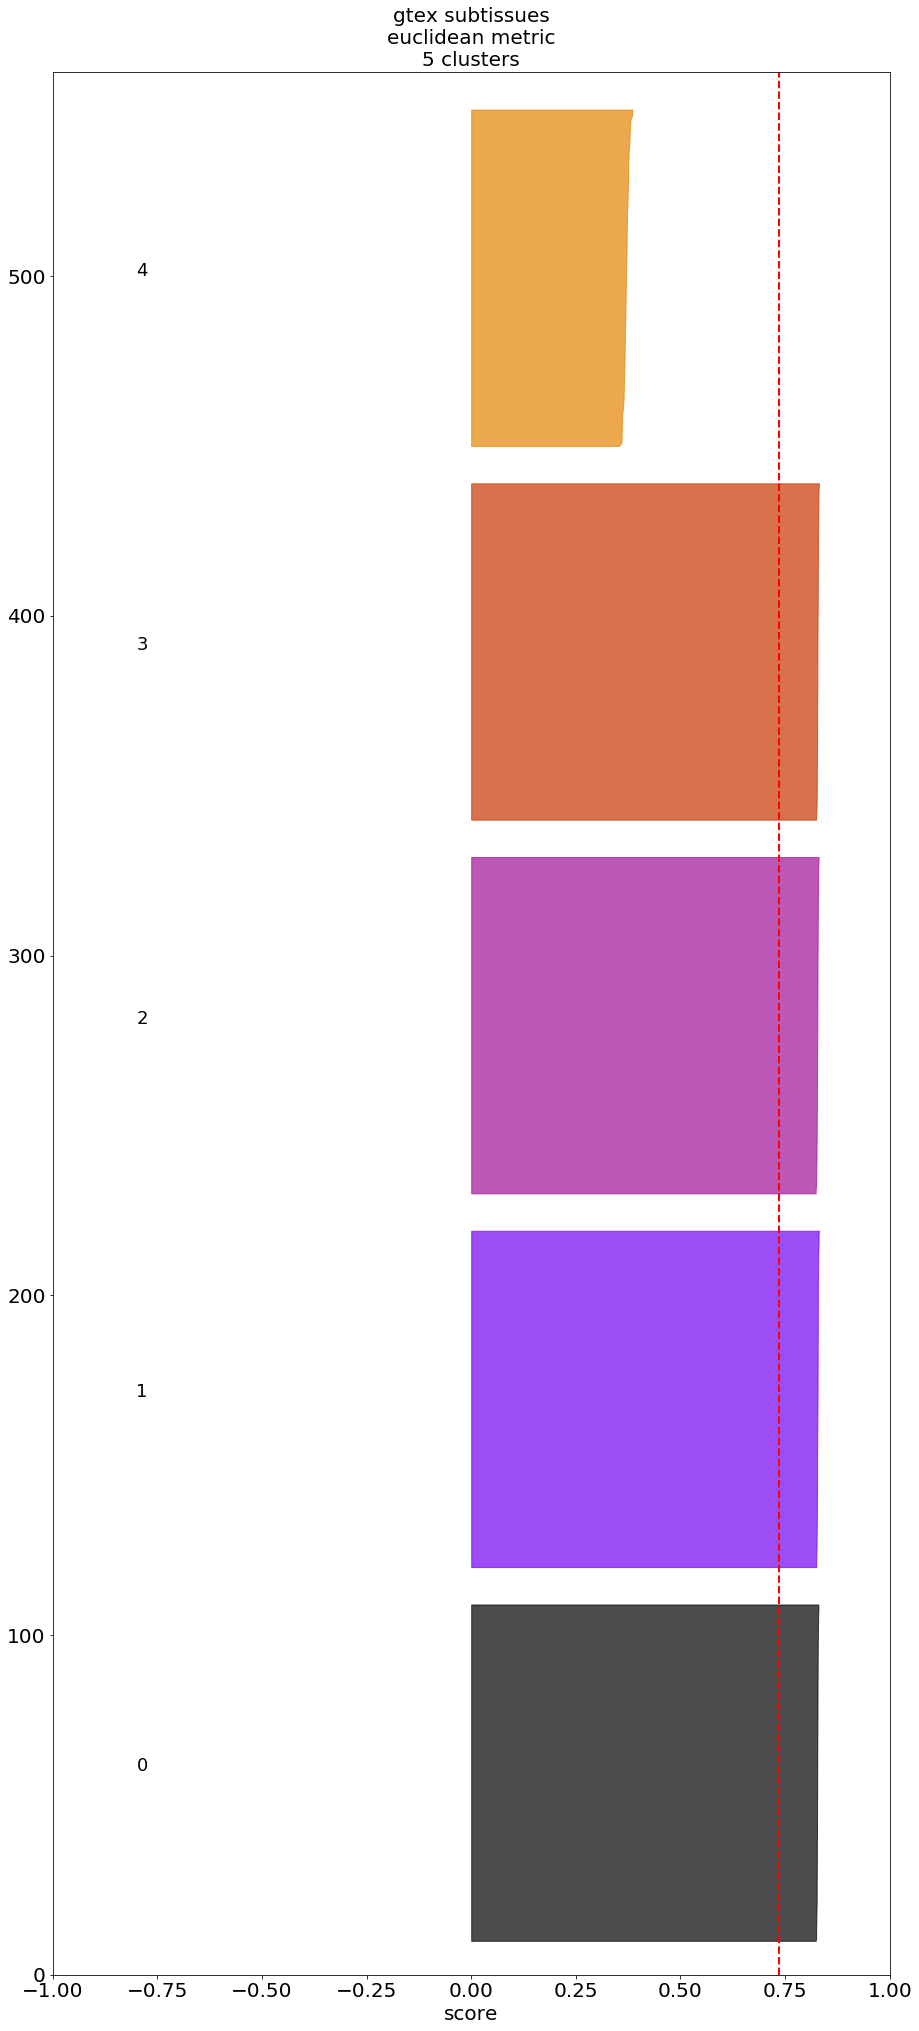

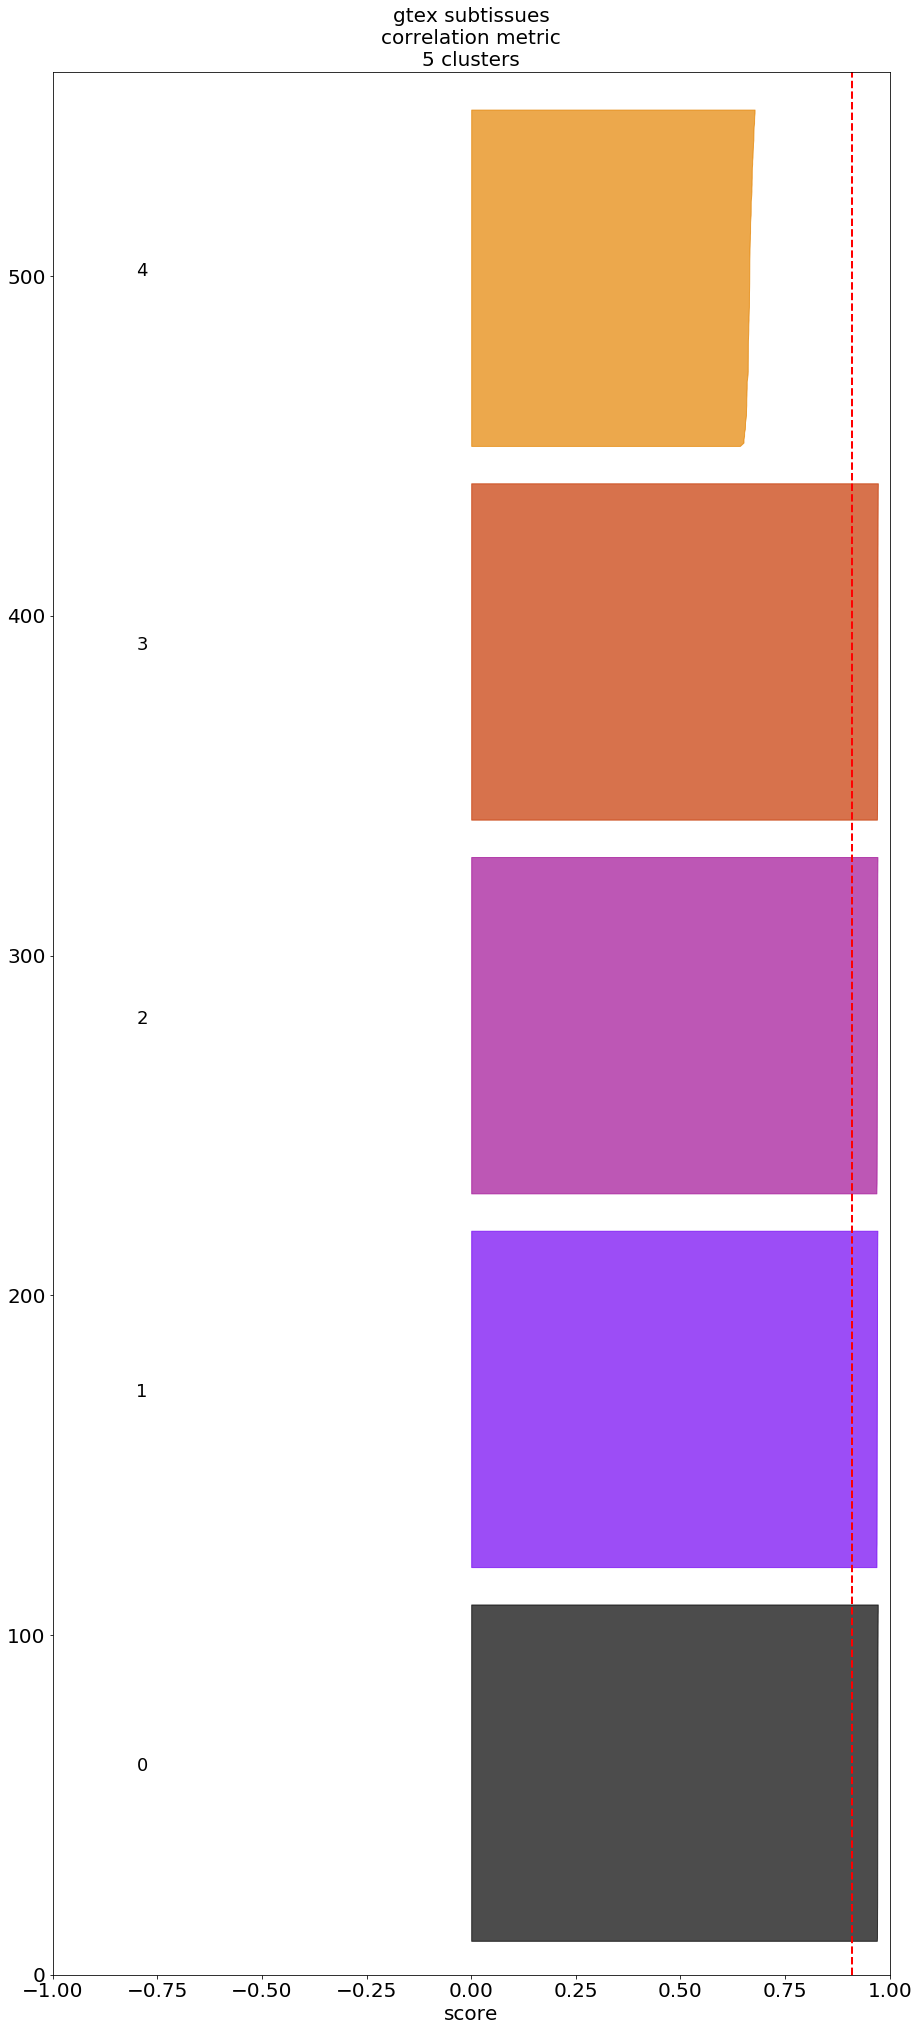

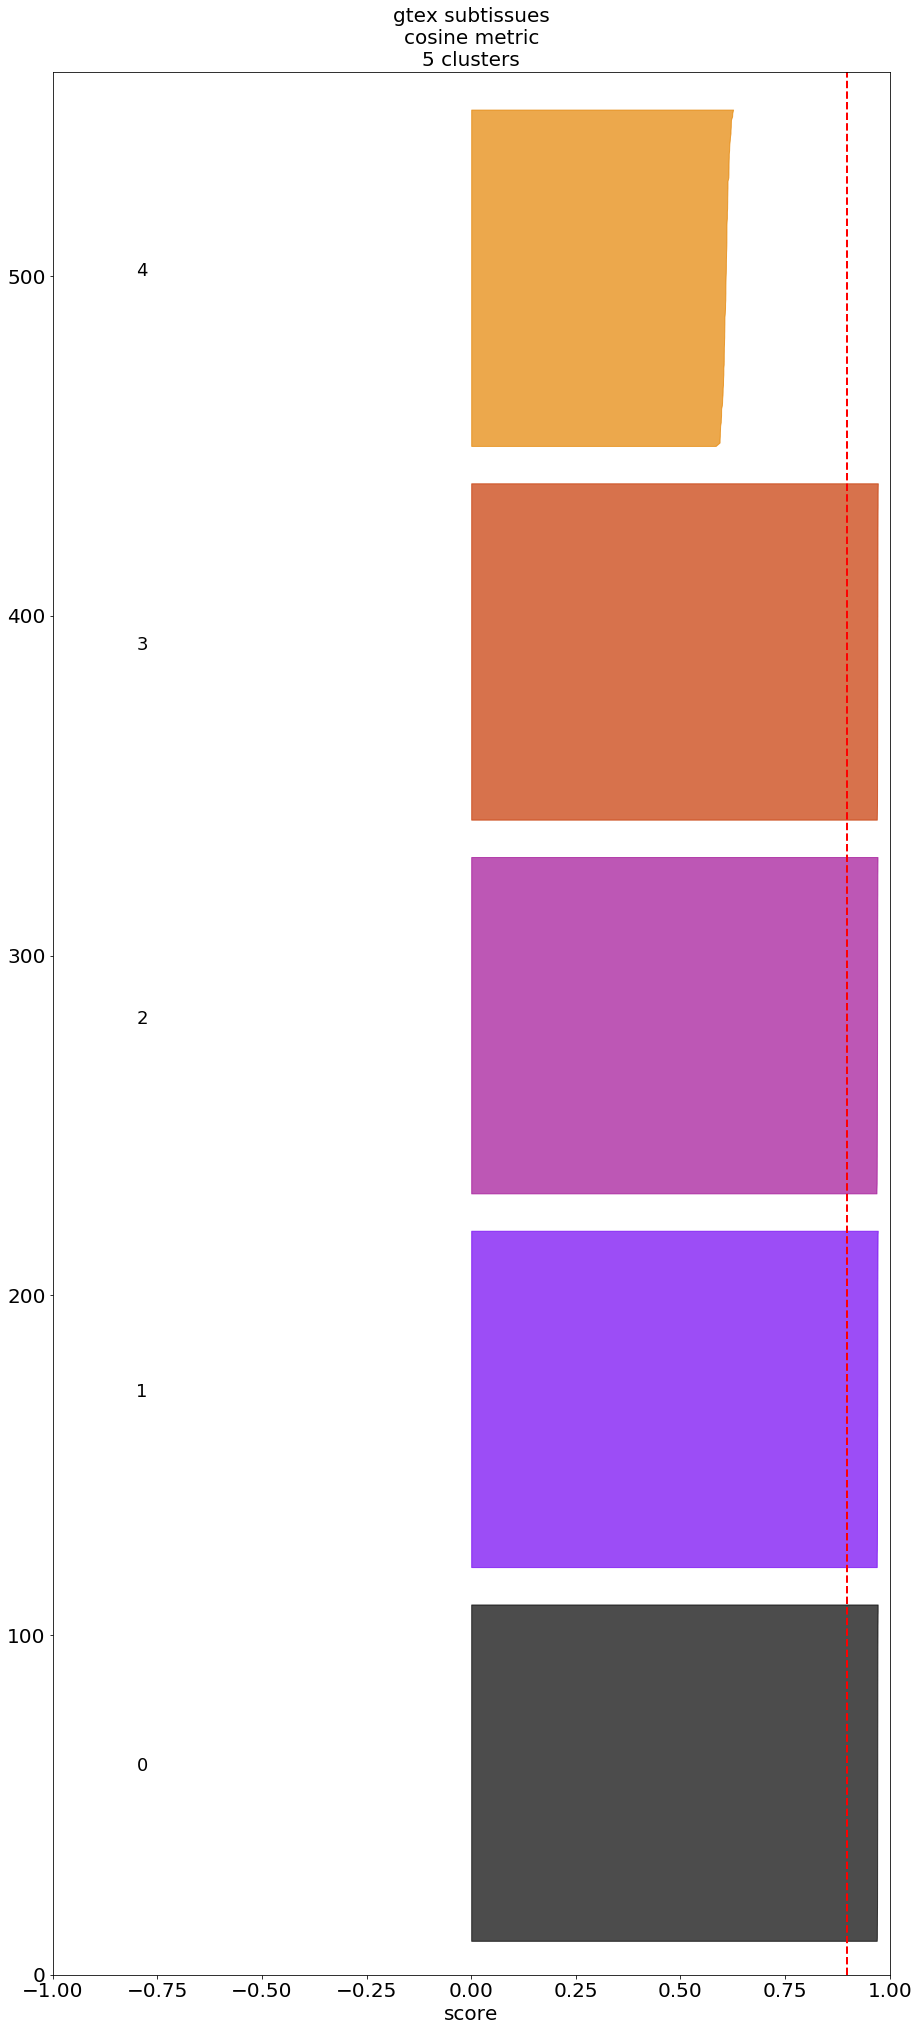

In [130]:
make_silhouette(out)

In [131]:
model=AgglomerativeClustering(n_clusters=5, linkage='average')

In [132]:
hierout = model.fit_predict(data)

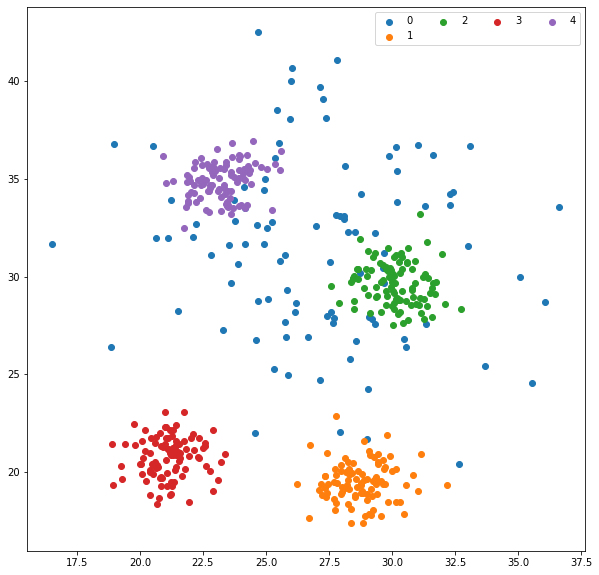

In [133]:
make_figure(hierout)

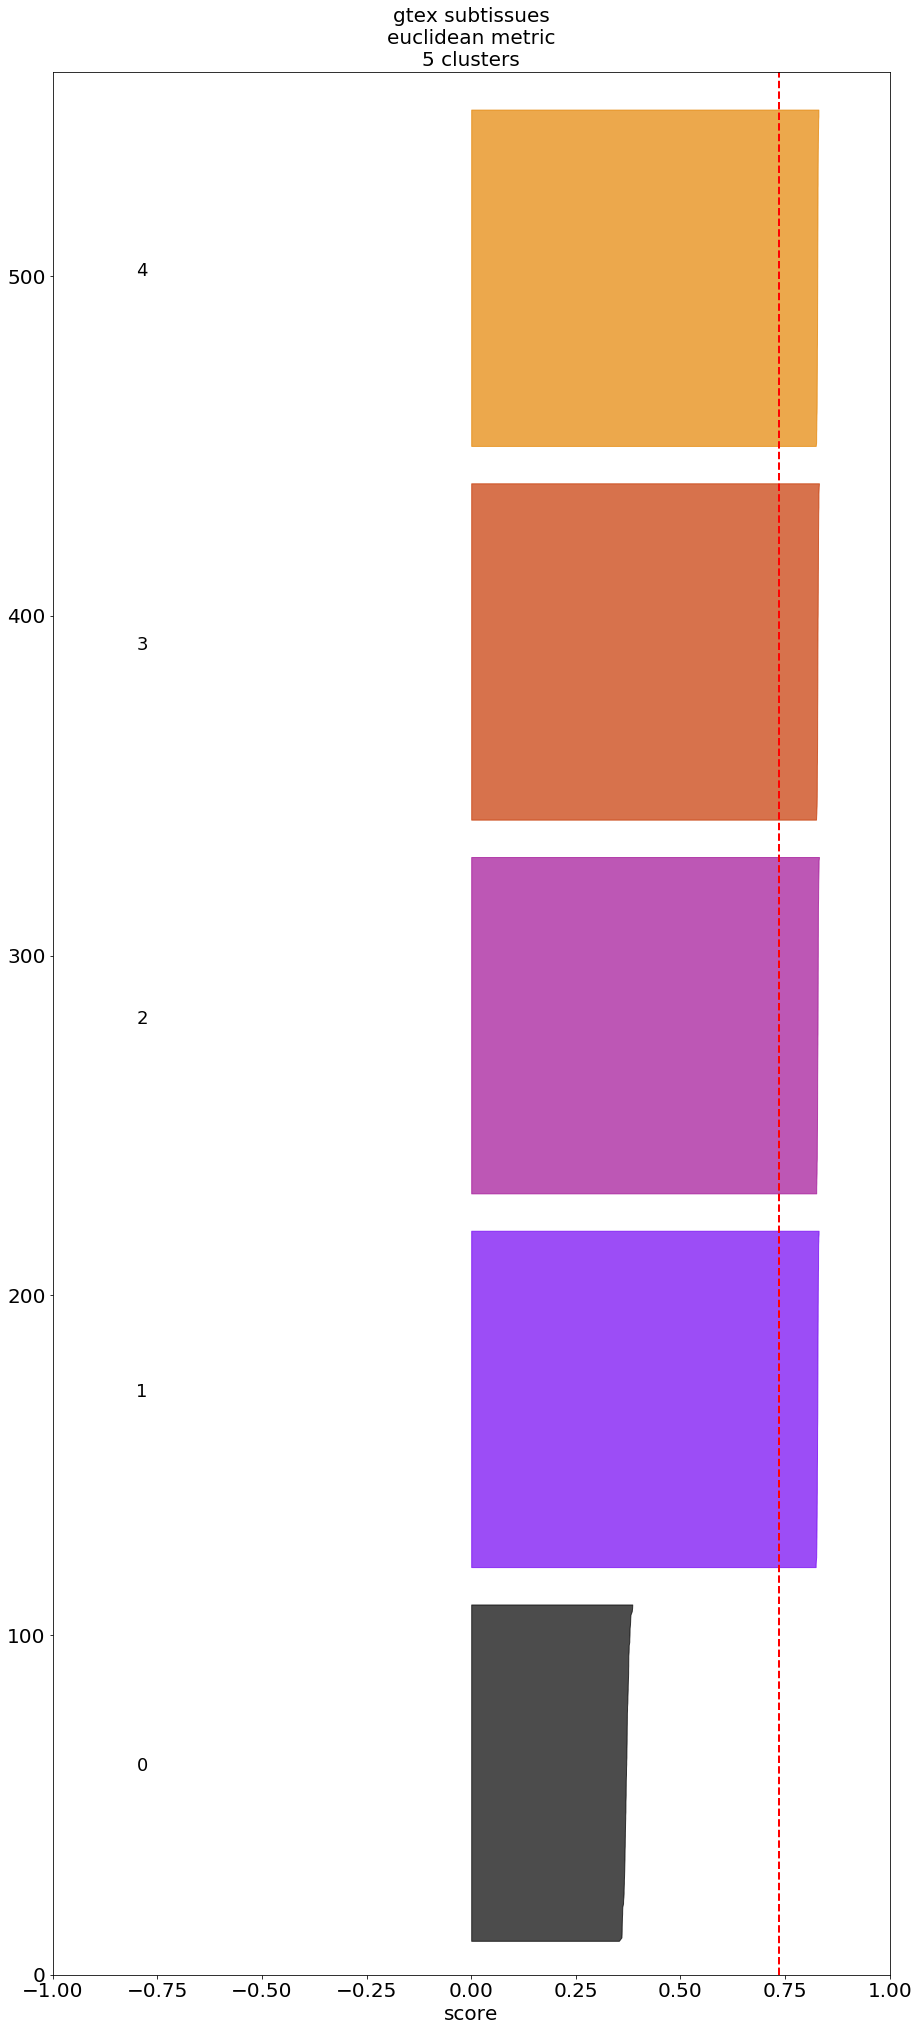

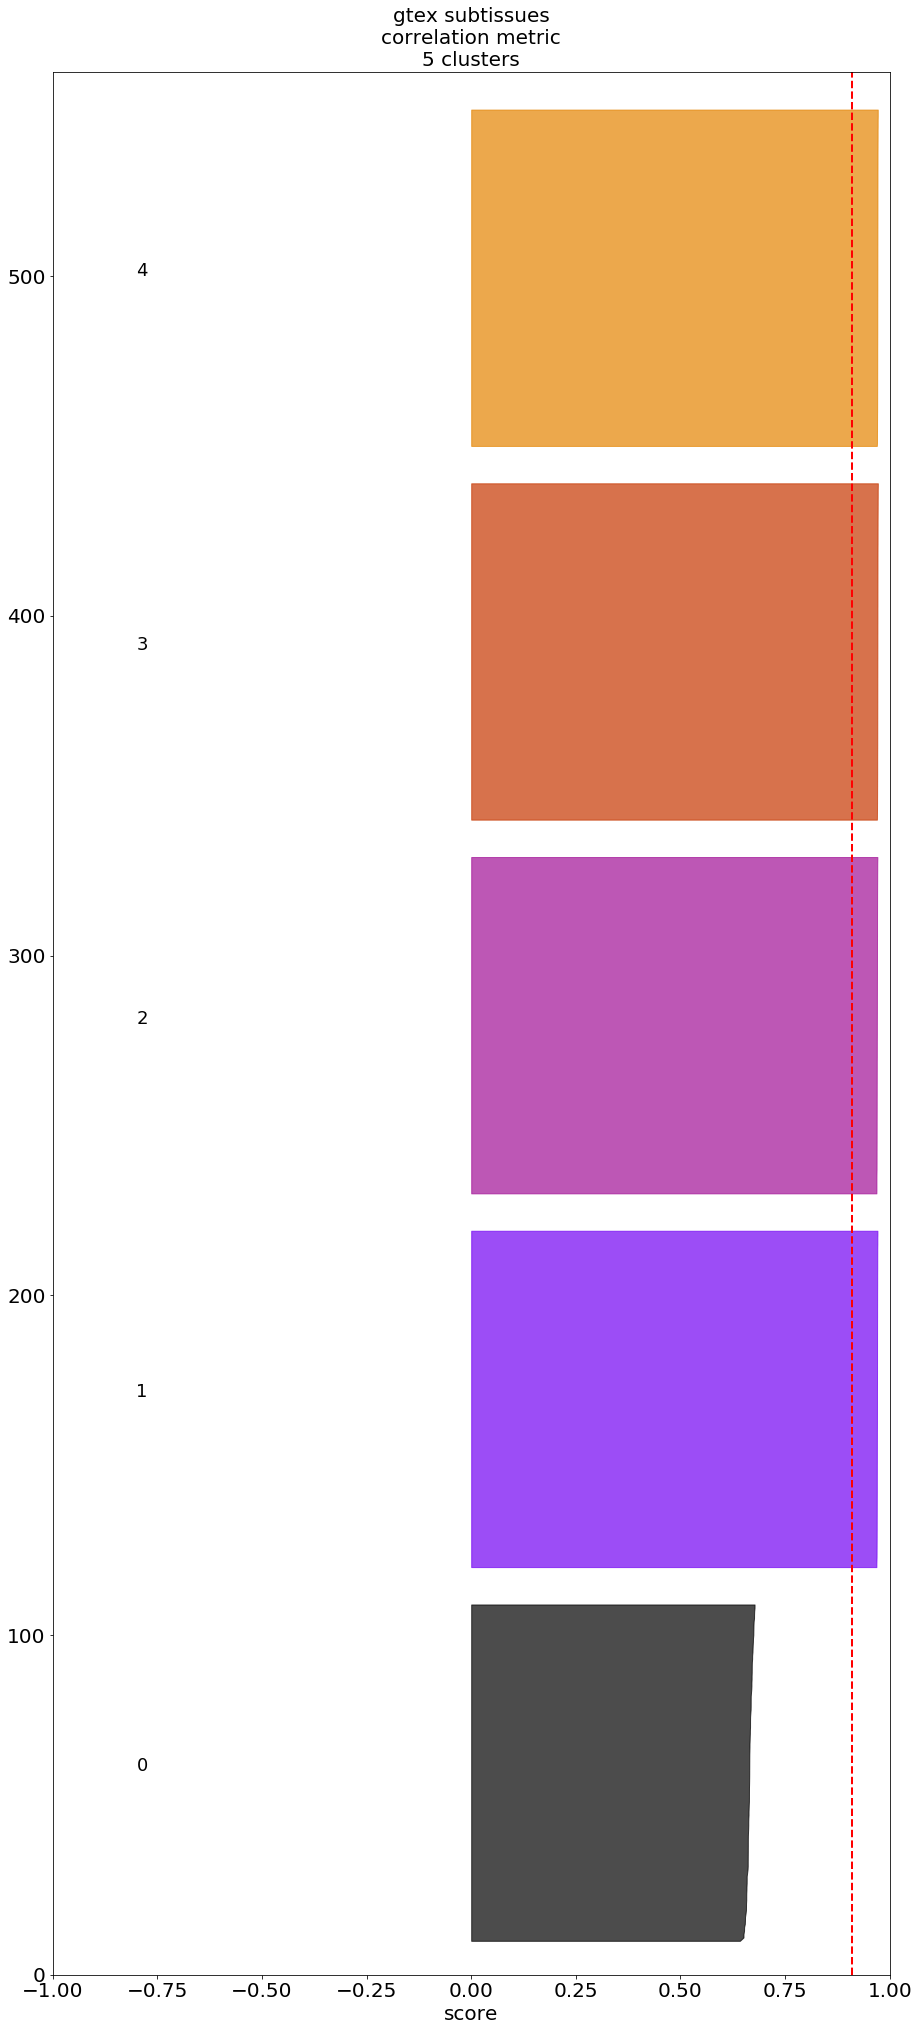

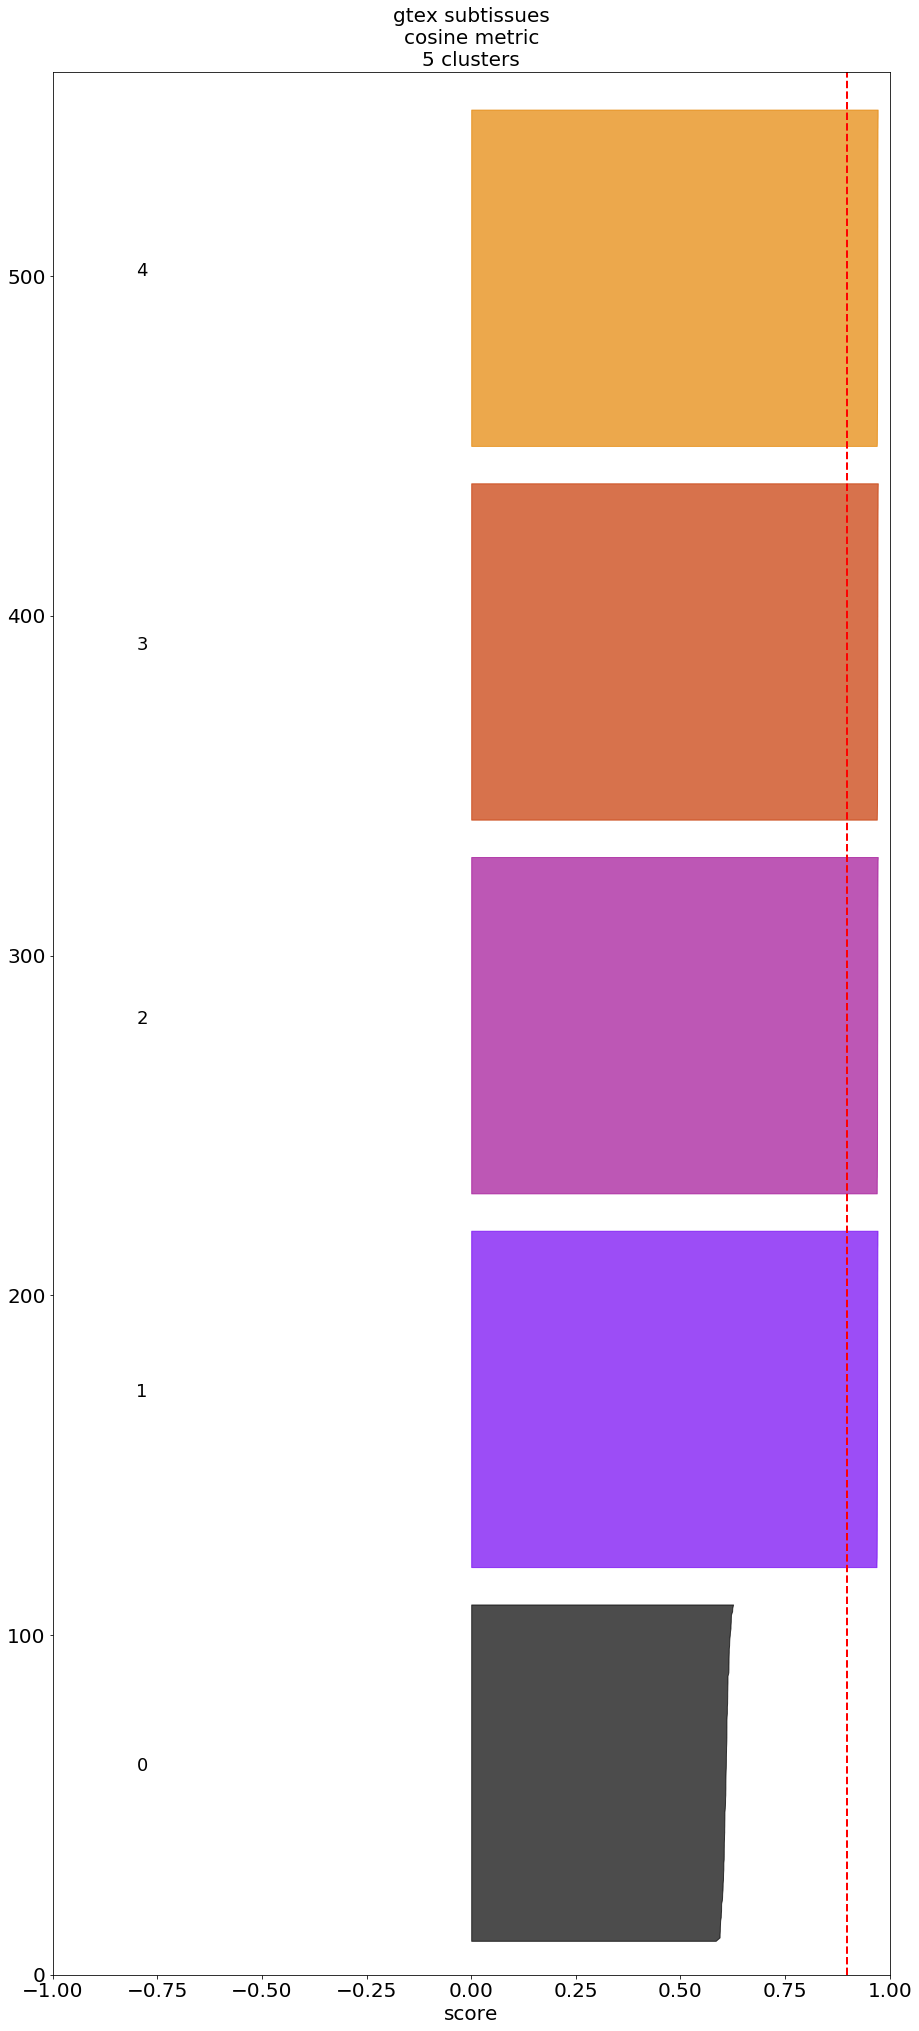

In [134]:
make_silhouette(hierout)

In [135]:
from sklearn.decomposition import LatentDirichletAllocation

In [136]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)

In [137]:
ldaout = np.argmax(lda.fit_transform(data), axis=1)

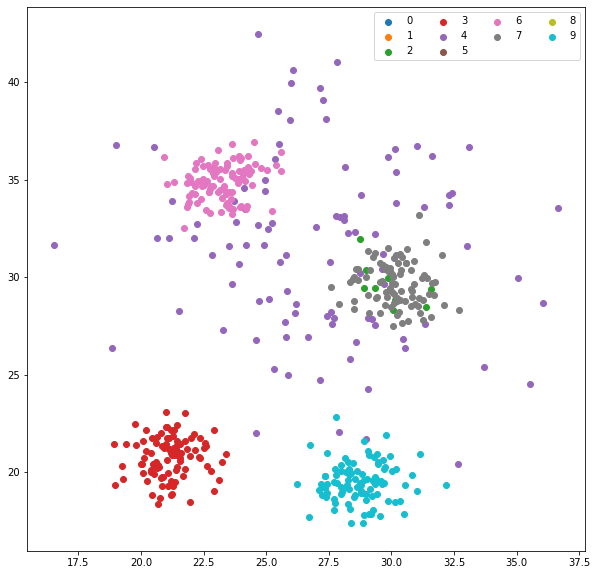

In [138]:
make_figure(ldaout)

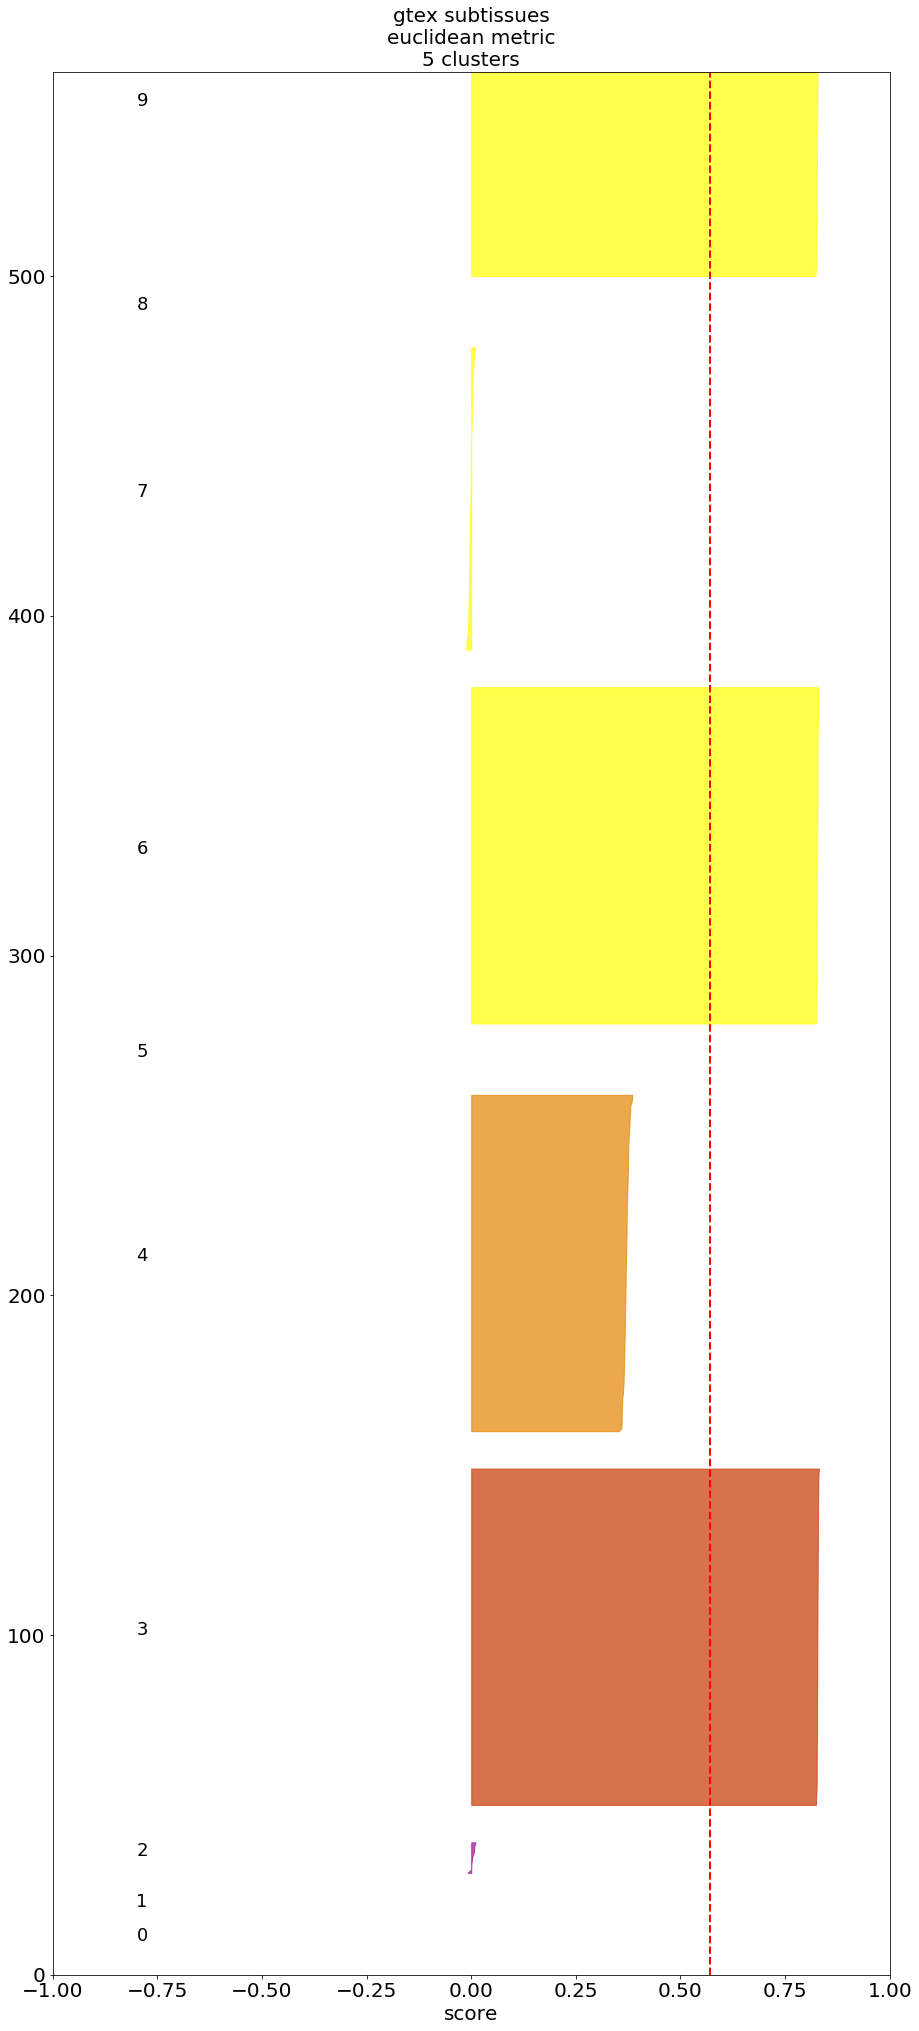

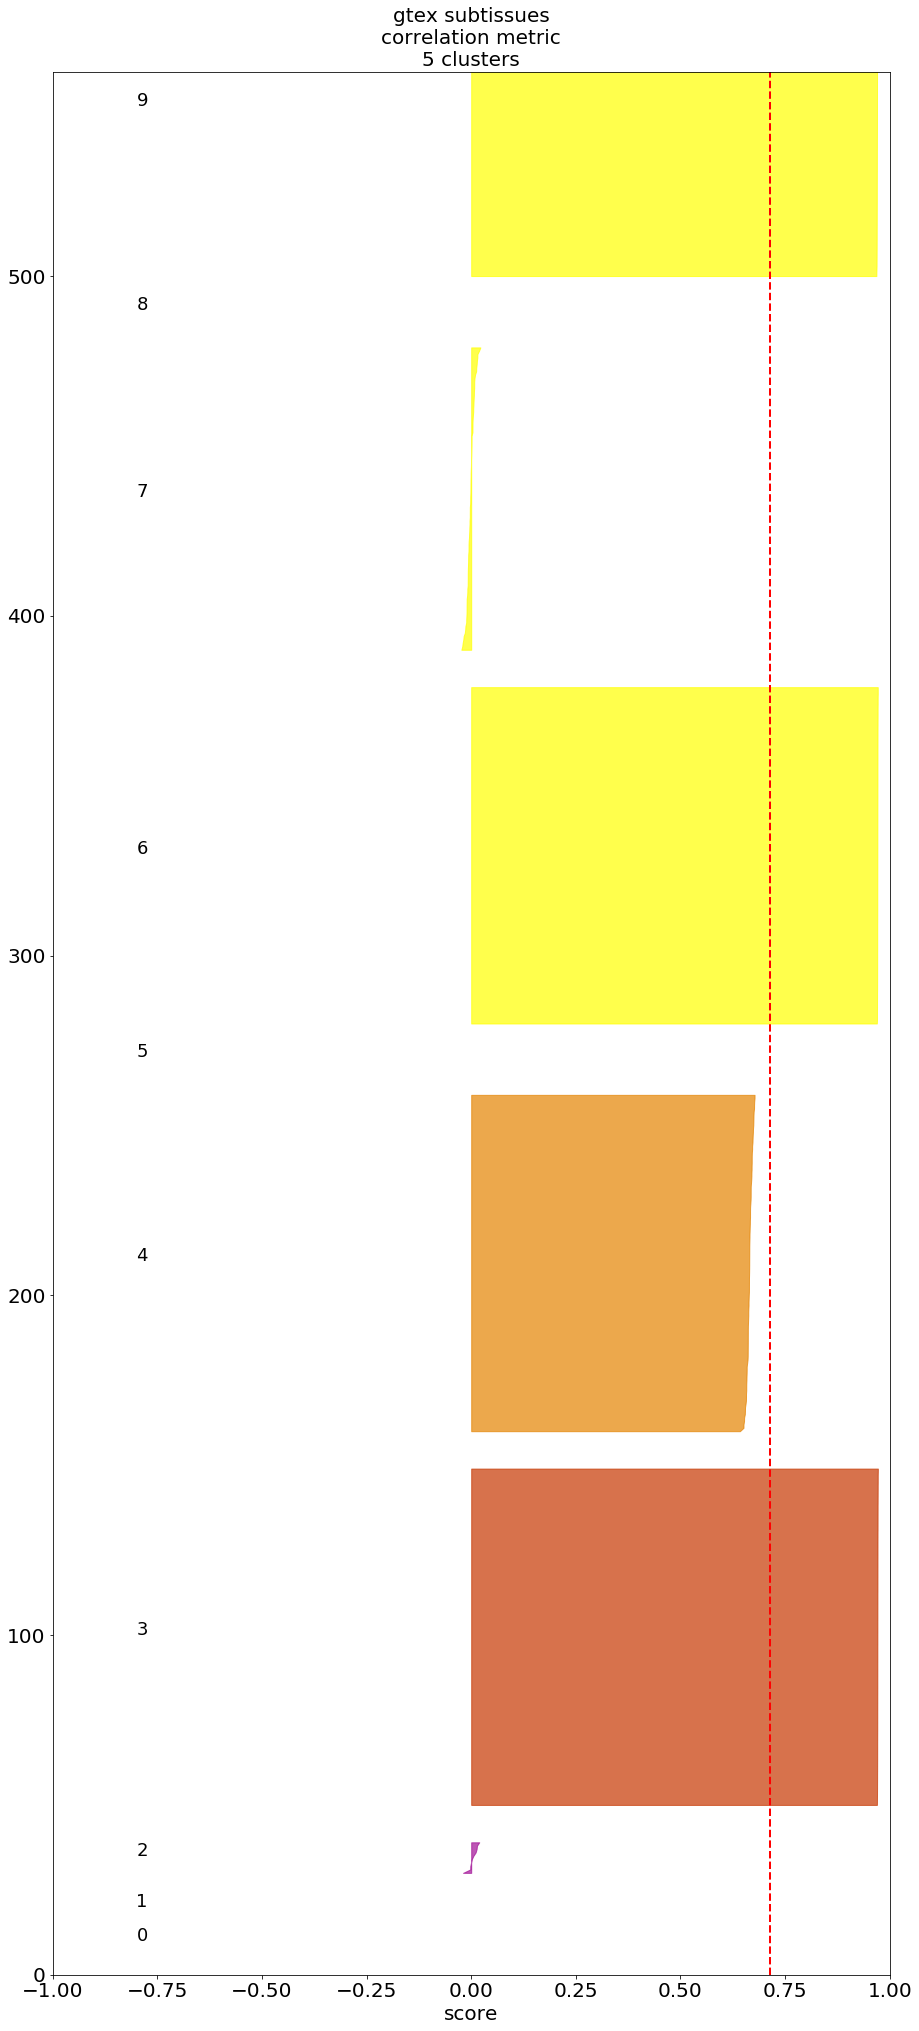

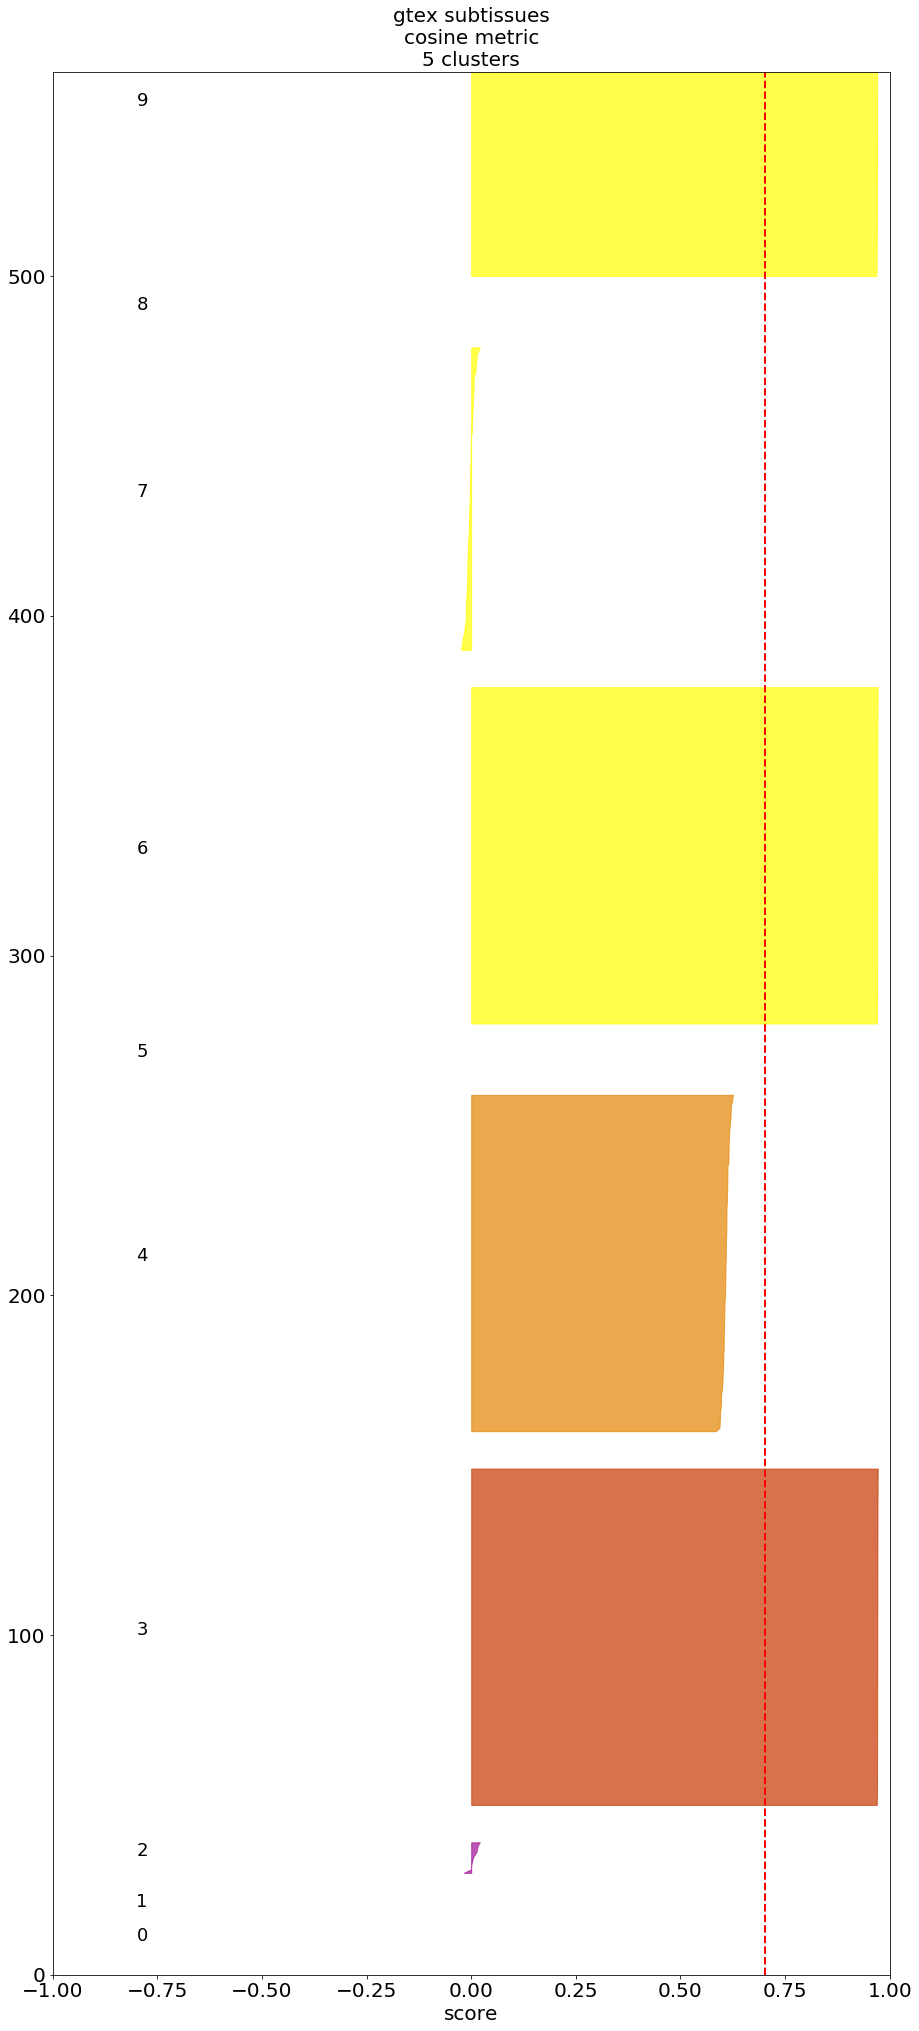

In [139]:
make_silhouette(ldaout)